## Credit scoring and segmentation

In [10]:
# import des librairies
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [3]:
# import du dataset
data_credit_scoring = pd.read_csv("/Users/ranu/Documents/Data-Science-project/Finance/synthetic_credit_data.csv")

In [4]:
# 10 premières lignes du dataset
data_credit_scoring.head(10)

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,56,Male,Single,PhD,Unemployed,0.40,2483.9,1,2877543,6.38,36,Auto Loan
1,69,Male,Married,Master,Unemployed,0.95,579.4,4,3380698,6.00,36,Personal Loan
2,46,Male,Widowed,PhD,Employed,0.97,2455.1,5,2332018,6.98,12,Home Loan
3,32,Female,Single,Bachelor,Self-Employed,0.39,1100.2,13,725003,8.06,24,Auto Loan
4,60,Male,Widowed,High School,Employed,0.85,860.8,6,2285598,6.34,12,Home Loan
5,25,Male,Married,PhD,Employed,0.77,789.3,5,4902571,2.59,60,Personal Loan
6,38,Male,Single,PhD,Employed,0.31,568.1,1,4501260,3.20,36,Personal Loan
7,56,Female,Divorced,PhD,Unemployed,0.23,1809.0,3,846002,7.40,48,Home Loan
8,36,Female,Married,PhD,Unemployed,0.46,1045.6,1,1371621,2.97,12,Home Loan
9,40,Male,Divorced,High School,Unemployed,0.78,2973.6,11,1180642,2.01,60,Home Loan


In [5]:
# Info sur les données
print(data_credit_scoring.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


In [6]:
# Détails des données
data_credit_scoring.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,43.81900,0.515120,1704.916700,7.452000,2.546580e+06,4.995760,35.304000
std,14.99103,0.283412,732.590195,4.021675,1.432169e+06,2.011785,17.475382
min,18.00000,0.000000,500.500000,1.000000,2.287900e+04,1.500000,12.000000
25%,31.00000,0.280000,1075.325000,4.000000,1.352033e+06,3.245000,24.000000
50%,44.00000,0.520000,1672.900000,7.000000,2.557906e+06,4.945000,36.000000
75%,56.00000,0.760000,2356.800000,11.000000,3.818636e+06,6.800000,48.000000
max,69.00000,1.000000,2994.100000,14.000000,4.986820e+06,8.490000,60.000000


In [7]:
# Boxplot sur le ratio d'utilisation du crédit
credit_boxplot_fig = px.box(data_credit_scoring,
                            y = "Credit Utilization Ratio",
                            title="Distribution des valeurs d'utilisation de crédit")

credit_boxplot_fig.show()

In [8]:
# Distribution du nombre de compte de crédits
nb_credit_account_boxplot_fig = px.box(data_credit_scoring,
                            y = "Number of Credit Accounts",
                            title="Distribution du nombre de compte de crédits")

nb_credit_account_boxplot_fig.show()

In [9]:
# Histogramme des prêts
loan_amount_fig = px.histogram(data_credit_scoring, 
                               x='Loan Amount', 
                               nbins=20, 
                               title='Distribution de la quantité de prêt')
loan_amount_fig.show()

<Axes: >

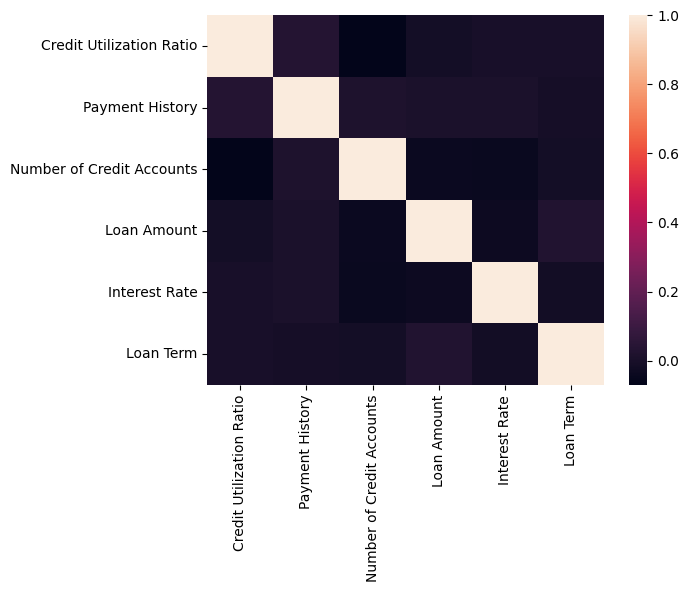

In [14]:
# Matrice de corrélation
interest_features_data = data_credit_scoring[['Credit Utilization Ratio', 
                   'Payment History', 
                   'Number of Credit Accounts', 
                   'Loan Amount', 'Interest Rate', 
                   'Loan Term']]

sns.heatmap(interest_features_data.corr())